### Bayesian Network Structure Learnt with Bayesian Dirichlet equivalent uniform

#### Prep training data

In [7]:
import bnlearn as bn
import pandas as pd
import graphviz as gh
from sklearn.model_selection import train_test_split

# Load dataset and convert for trainning
rel_path = 'bn_train_cata_data.csv'
cata_data = pd.read_csv(rel_path)
dfhot, dfnum = bn.df2onehot(cata_data)
print(dfhot)
print(dfnum)

train_num, test_num = train_test_split(dfnum, test_size=0.2)

# prep eval data
index_ref_str_list = []
for i in test_num:
    index_ref_str_list.append(i)

test_info_dict_list = []
for i in test_num.index:
    curr_dict = {}
    for j in index_ref_str_list:
        curr_dict[j] = test_num[j][i]
    test_info_dict_list.append(curr_dict)






[df2onehot] >Auto detecting dtypes.


  0%|          | 0/17 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 100.00it/s]

[df2onehot] >Set dtypes in dataframe..



[df2onehot]: 100%|██████████| 17/17 [00:00<00:00, 320.75it/s]


[df2onehot] >Total onehot features: 48
      flowS1-curr_large  flowS1-curr_medium  flowS1-curr_small  \
0                 False                True              False   
1                 False                True              False   
2                 False                True              False   
3                 False                True              False   
4                 False                True              False   
...                 ...                 ...                ...   
9054              False                True              False   
9055              False                True              False   
9056              False                True              False   
9057              False                True              False   
9058              False                True              False   

      prcpS1-1day_large  prcpS1-1day_medium  prcpS1-1day_small  \
0                  True               False              False   
1                 False             

#### Auto Structure Learning

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


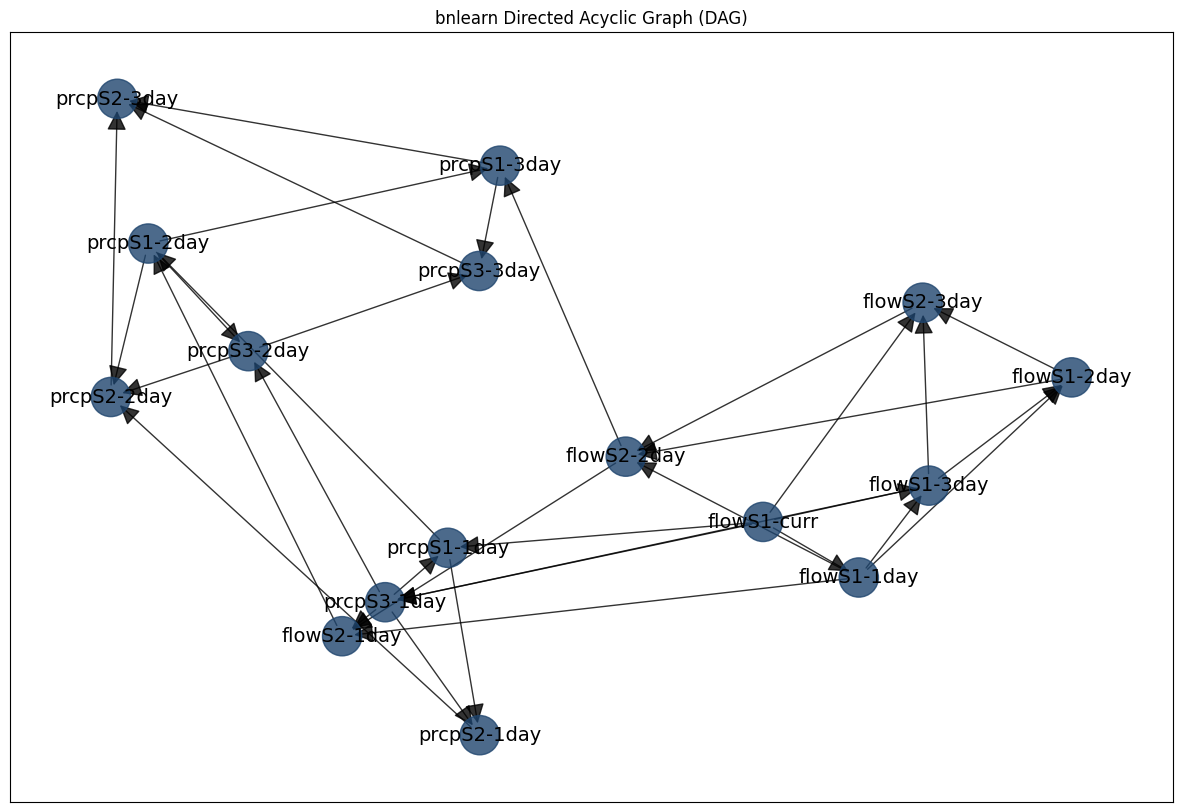

In [8]:
model_hc_bic  = bn.structure_learning.fit(train_num, methodtype='hc', scoretype='bdeu')
G = bn.plot(model_hc_bic)

#### Model Fit 

In [9]:
# fit data into learnt structures 

model_bdeu = bn.parameter_learning.fit(model_hc_bic, dfnum)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of flowS1-curr:
+----------------+----------+
| flowS1-curr(1) | 0.248467 |
+----------------+----------+
| flowS1-curr(2) | 0.250058 |
+----------------+----------+
| flowS1-curr(3) | 0.501475 |
+----------------+----------+
[bnlearn] >CPD of prcpS1-1day:
+----------------+-----+----------------------+
| flowS1-curr    | ... | flowS1-curr(3)       |
+----------------+-----+----------------------+
| prcpS3-1day    | ... | prcpS3-1day(3)       |
+----------------+-----+----------------------+
| prcpS1-1day(1) | ... | 0.018120653003941965 |
+----------------+-----+----------------------+
| prcpS1-1day(2) | ... | 0.05350545889831383  |
+----------------+-----+----------------------+
| prcpS1-1day(3) | ... | 0.9283738880977442   |
+----------------+-----+----------------------+
[bnlea

#### Testing Model with Test Data

In [10]:
curr_model = model_bdeu

model_correct_count = 0
for curr_dict in test_info_dict_list:
    curr_obs = curr_dict["flowS1-curr"] - 1 # result index is result cata -1
    print(curr_dict)
    curr_evidence_dict = curr_dict
    del curr_evidence_dict["flowS1-curr"]
    inf_result = bn.inference.fit(curr_model, variables=["flowS1-curr"], evidence=curr_evidence_dict)
    max_p_index = inf_result.df.idxmax().values[1] # this is the index of cata w/ highest p 
    curr_eval_result = max_p_index == curr_obs
    print(curr_obs)
    print(max_p_index)
    if max_p_index == curr_obs:
        model_correct_count += 1
        
model_bic_eval = model_correct_count/(len(test_info_dict_list))
print(model_bic_eval)

{'flowS1-curr': 3, 'prcpS1-1day': 1, 'prcpS2-1day': 2, 'prcpS3-1day': 1, 'flowS1-1day': 3, 'flowS2-1day': 3, 'prcpS1-2day': 1, 'prcpS2-2day': 1, 'prcpS3-2day': 1, 'flowS1-2day': 3, 'flowS2-2day': 3, 'prcpS1-3day': 3, 'prcpS2-3day': 3, 'prcpS3-3day': 3, 'flowS1-3day': 3, 'flowS2-3day': 3}
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------------+-----------+
|    |   flowS1-curr |         p |
+====+===============+===========+
|  0 |             1 | 0.0408261 |
+----+---------------+-----------+
|  1 |             2 | 0.0815943 |
+----+---------------+-----------+
|  2 |             3 | 0.87758   |
+----+---------------+-----------+
2
2
{'flowS1-curr': 2, 'prcpS1-1day': 3, 'prcpS2-1day': 3, 'prcpS3-1day': 3, 'flowS1-1day': 2, 'flowS2-1day': 2, 'prcpS1-2day': 3, 'prcpS2-2day': 3, 'prcpS3-2day': 3, 'flowS1-2day': 2, 'flowS2-2day': 2, 'prcpS1-3day': 3, 'prcpS2-3day': 3, 'prcpS3-3day': 3, 'fl